## 🧾 Project Overview

### 📌 Project Title:  
**Vaccine Prediction Model – A Public Health ML Project**

### 🎯 Objective:  
This project aims to predict whether individuals are likely to receive the **H1N1 vaccine** and the **seasonal flu vaccine** using real-world survey data. The purpose is to help public health authorities **identify hesitant populations** and **tailor vaccine awareness campaigns**, especially in the context of pandemic preparedness.

### 📈 Problem Statement:
Governments and health organizations often face challenges in predicting vaccine uptake, which is critical for resource allocation and public health strategy. Using historical survey data, this project leverages machine learning to model and predict vaccination behavior based on:
- Demographics (age, education, income)
- Health conditions (chronic illness, doctor visits)
- Behavior (use of antivirals, contact with infected individuals)
- Attitudes and opinions (trust in government, perceived risk)

---

## 🔍 What the Project Does :

- Performs detailed **Exploratory Data Analysis (EDA)** to understand data distribution, missing values, and patterns in vaccine uptake.
- Prepares data for machine learning by handling missing values, encoding categorical features, and feature selection.
- Trains and evaluates **multiple machine learning models** including:
  - Logistic Regression
  - Random Forest
  - Gradient Boosting Models (like XGBoost)
  - Others (as needed)
- Selects the **best-performing model based on ROC-AUC score**, and uses it for generating predictions.
- Provides individual-level predictions for the likelihood of receiving:
  - H1N1 vaccine
  - Seasonal flu vaccine

---

### 📊 Value Proposition:
- **Public Health Insight**: Helps stakeholders understand who is more or less likely to get vaccinated.
- **Data-Driven Decisions**: Enables targeted awareness programs.
- **Scalability**: The approach can be extended to other vaccines or behavioral predictions.

---



## EDA: Vaccine Prediction Model



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ✅ Step 1: Load the Data

- `training_set_features.csv`
- `training_set_labels.csv`

In [ ]:
# Load feature and label data
features = pd.read_csv('/content/training_set_features.csv')
labels = pd.read_csv('/content/training_set_labels.csv')

In [ ]:
features.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [ ]:
labels.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0


In [ ]:
# Merge on 'respondent_id'
data = features.merge(labels, on='respondent_id')

In [ ]:
data.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


In [ ]:
print("Shape of data:", data.shape)

Shape of data: (26707, 38)


In [ ]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

---

## 📚 Dataset Description

The dataset consists of **36 columns**, including the `respondent_id` and 35 features that cover:
- Demographics
- Health behaviors
- Medical conditions
- Personal beliefs and opinions
- Household and employment information

### 🧾 Feature Overview

#### 🧑 Demographics:
- `age_group`: Age group of the respondent
- `education`: Highest education level
- `race`: Race of the respondent
- `sex`: Gender
- `income_poverty`: Income with respect to 2008 poverty threshold
- `marital_status`: Marital status
- `rent_or_own`: Housing situation
- `employment_status`: Current job status
- `employment_industry`: Industry (coded)
- `employment_occupation`: Occupation (coded)

#### 🏠 Household Information:
- `household_adults`: Number of other adults (top-coded to 3)
- `household_children`: Number of children (top-coded to 3)
- `hhs_geo_region`: Geographic region (coded)
- `census_msa`: Metro statistical area classification

#### 💉 Health Behavior & Medical Condition (Binary: 0 = No, 1 = Yes):
- `behavioral_antiviral_meds`
- `behavioral_avoidance`
- `behavioral_face_mask`
- `behavioral_wash_hands`
- `behavioral_large_gatherings`
- `behavioral_outside_home`
- `behavioral_touch_face`
- `doctor_recc_h1n1`
- `doctor_recc_seasonal`
- `chronic_med_condition`
- `child_under_6_months`
- `health_worker`
- `health_insurance`

#### 💭 Opinions (Ordinal / Categorical):
- `h1n1_concern`: Level of concern about H1N1
- `h1n1_knowledge`: Knowledge about H1N1
- `opinion_h1n1_vacc_effective`
- `opinion_h1n1_risk`
- `opinion_h1n1_sick_from_vacc`
- `opinion_seas_vacc_effective`
- `opinion_seas_risk`
- `opinion_seas_sick_from_vacc`

#### 🎯 Target Variables:
- `h1n1_vaccine`: Did the person get the H1N1 vaccine? (0/1)
- `seasonal_vaccine`: Did the person get the seasonal flu vaccine? (0/1)

---

### ✅ Step 2: Understand Data Types & Missing Values

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

---

### Dataset Dimensions:
- **Total Records**: 26,707
- **Total Features (excluding target)**: 36  
- **Targets**: `h1n1_vaccine`, `seasonal_vaccine`

### Data Types Breakdown:
- `int64`: 3 columns
- `float64`: 23 columns
- `object`: 12 columns (mostly categorical)

---



In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Check missing values
missing = data.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_seasonal,2160
doctor_recc_h1n1,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


<Figure size 1200x600 with 0 Axes>

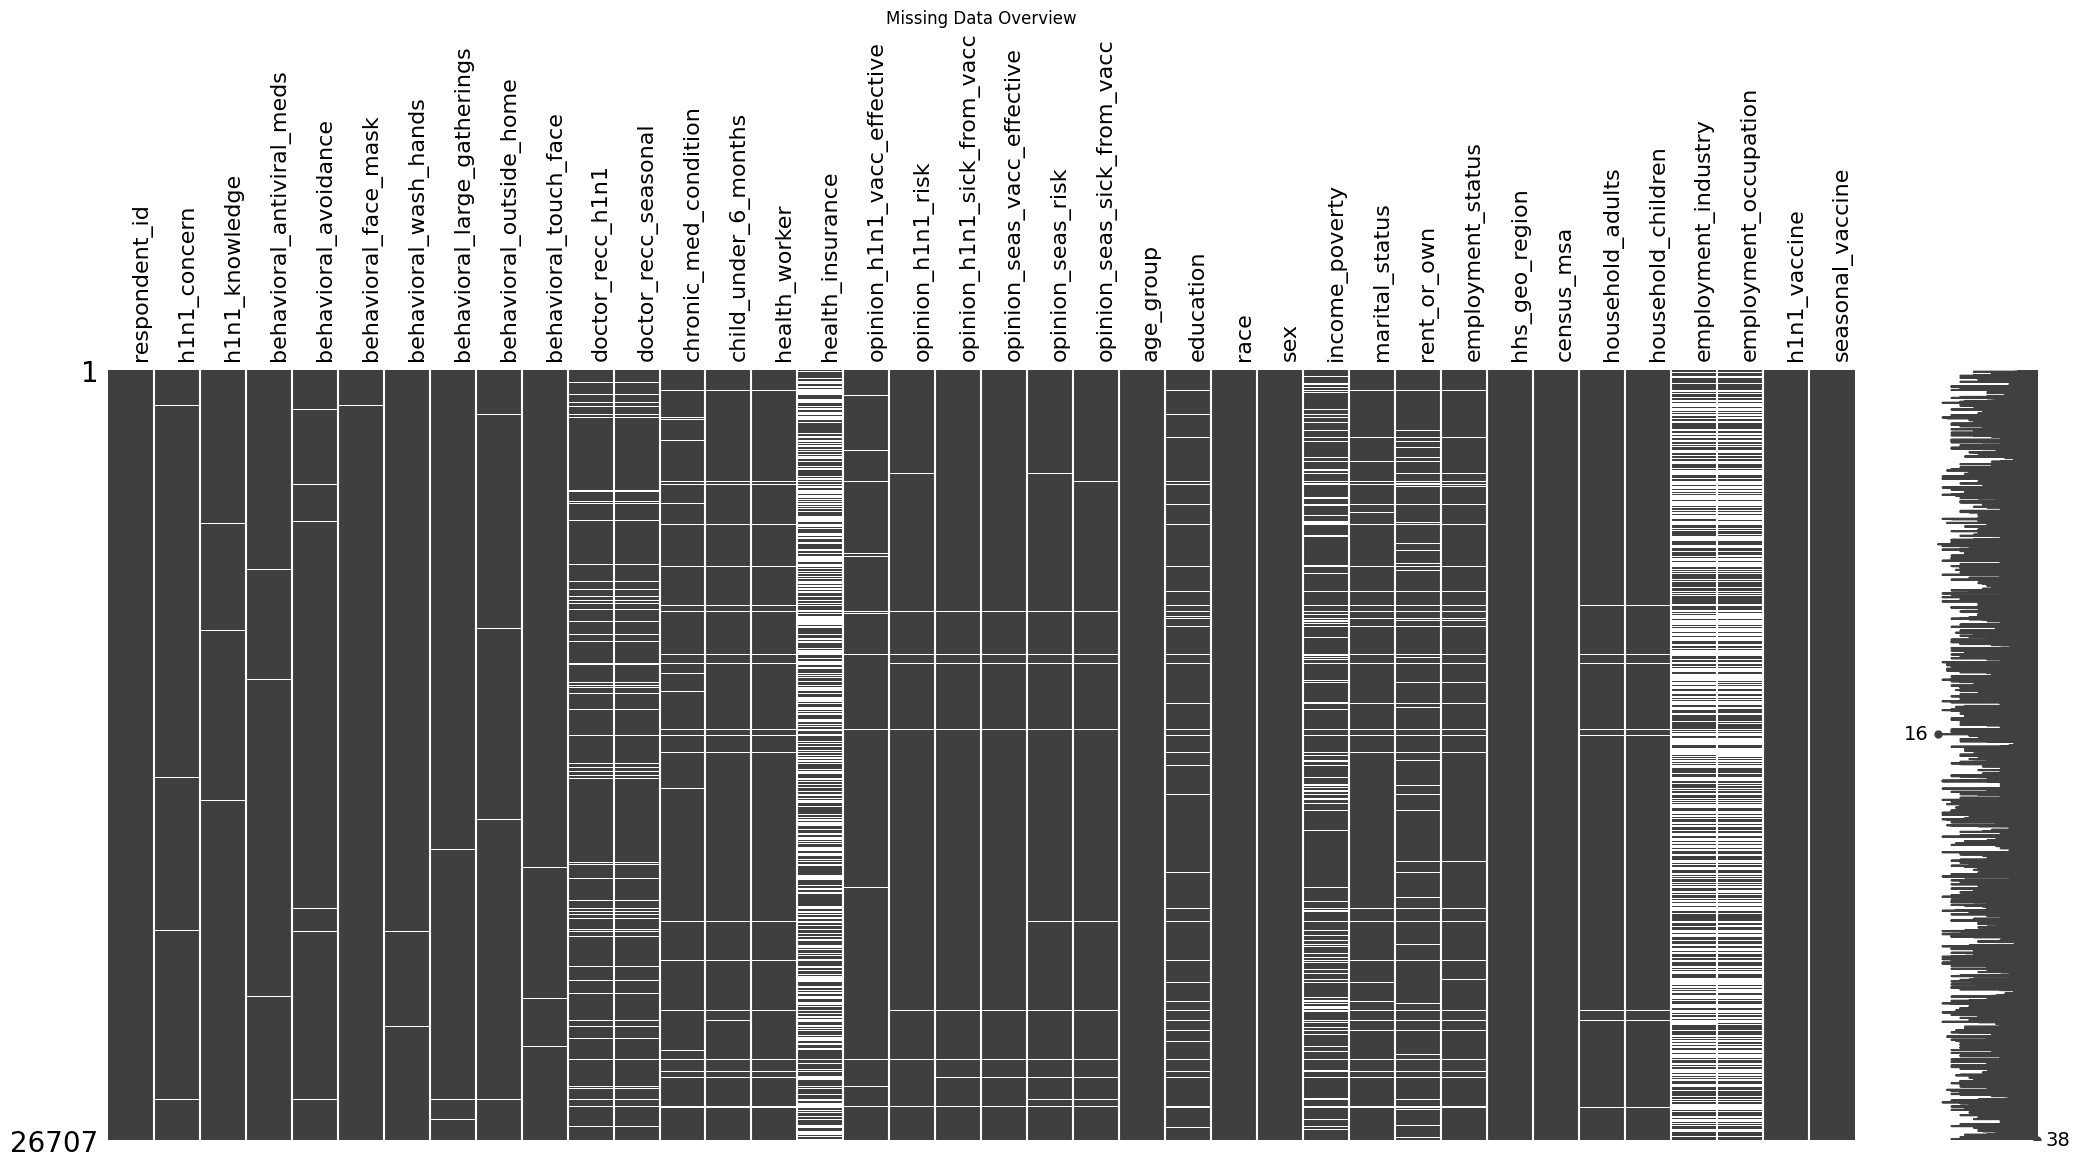

In [ ]:
# Visualize the missing data
import missingno as msno

plt.figure(figsize=(12, 6))
msno.matrix(data)
plt.title("Missing Data Overview")
plt.xticks(rotation=90)
plt.show()


---

##  Missing Values Analysis

---

### 🟥 Features with High Missingness (> 40%):
| Feature                | Missing Values | % Missing |
|------------------------|----------------|------------|
| `employment_occupation` | 13,470         | ~50.4%     |
| `employment_industry`   | 13,330         | ~49.9%     |
| `health_insurance`      | 12,274         | ~45.9%     |

---

### 🟧 Moderate Missingness (10%–20%):
| Feature                            | Missing Values | % Missing |
|------------------------------------|----------------|------------|
| `income_poverty`                   | 4,423          | ~16.6%     |
| `doctor_recc_h1n1` / `seasonal`    | 2,160 each     | ~8.1%      |
| `rent_or_own`                      | 2,042          | ~7.6%      |
| `employment_status`                | 1,463          | ~5.5%      |
| `marital_status`                   | 1,408          | ~5.3%      |
| `education`                        | 1,407          | ~5.3%      |

---

### 🟩 Low Missingness (< 5%):
- Includes: `chronic_med_condition`, `health_worker`, `child_under_6_months`, `household_adults`, `household_children`, `h1n1_concern`, `h1n1_knowledge`, all `behavioral_*` columns, and opinion-related columns.
---

### Handle High Missing features (> 40%):

- `employment_occupation`
- `employment_industry`
- `health_insurance`

In [ ]:
data['employment_occupation'].value_counts()

,count
employment_occupation,
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485
kldqjyjy,469


In [ ]:
data['employment_occupation'] = data['employment_occupation'].fillna('unknown')

In [ ]:
data['employment_occupation'].value_counts()[:2]

,count
employment_occupation,
unknown,13470
xtkaffoo,1778


In [ ]:
data['employment_industry'].value_counts()

,count
employment_industry,
fcxhlnwr,2468
wxleyezf,1804
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614
vjjrobsf,527


In [ ]:
data['employment_industry'] = data['employment_industry'].fillna('unknown')

In [ ]:
data['employment_industry'].value_counts()[:2]

,count
employment_industry,
unknown,13330
fcxhlnwr,2468


In [ ]:
data['health_insurance'].value_counts()

,count
health_insurance,
1.0,12697
0.0,1736


In [ ]:
data['health_insurance'] = data['health_insurance'].fillna(2.0)

In [ ]:
data['health_insurance'].value_counts()

,count
health_insurance,
1.0,12697
2.0,12274
0.0,1736


### Handle Moderate Missing features (10% -20%)

In [ ]:
# Mode for categorical/ordinal features
moderate_missinig_col = ['income_poverty', 'rent_or_own', 'employment_status', 'marital_status', 'education', 'doctor_recc_h1n1', 'doctor_recc_seasonal']
for col in moderate_missinig_col:
    print(data[col].value_counts())
    print("-----------------------------------")

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64
-----------------------------------
rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64
-----------------------------------
employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64
-----------------------------------
marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64
-----------------------------------
education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64
-----------------------------------
doctor_recc_h1n1
0.0    19139
1.0     5408
Name: count, dtype: int64
-----------------------------------
doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64
-----------------------------------


In [ ]:
for col in moderate_missinig_col:
    data[col] = data[col].fillna(data[col].mode()[0])

### Handle Low missing features (<5%)

In [ ]:
low_missing_cols = [
    'chronic_med_condition', 'child_under_6_months', 'health_worker',
    'h1n1_concern', 'h1n1_knowledge',
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face',
    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
    'household_adults', 'household_children'
]

for col in low_missing_cols:
  print(data[col].value_counts())
  print("---------------------------")

chronic_med_condition
0.0    18446
1.0     7290
Name: count, dtype: int64
---------------------------
child_under_6_months
0.0    23749
1.0     2138
Name: count, dtype: int64
---------------------------
health_worker
0.0    23004
1.0     2899
Name: count, dtype: int64
---------------------------
h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
---------------------------
h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
---------------------------
behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64
---------------------------
behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
---------------------------
behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
---------------------------
behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64
---------------------------
behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count,

In [ ]:
for col in low_missing_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
data.isnull().sum()

,0
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


In [ ]:
data.to_csv("VaccineData.csv")

## Distribution Analysis

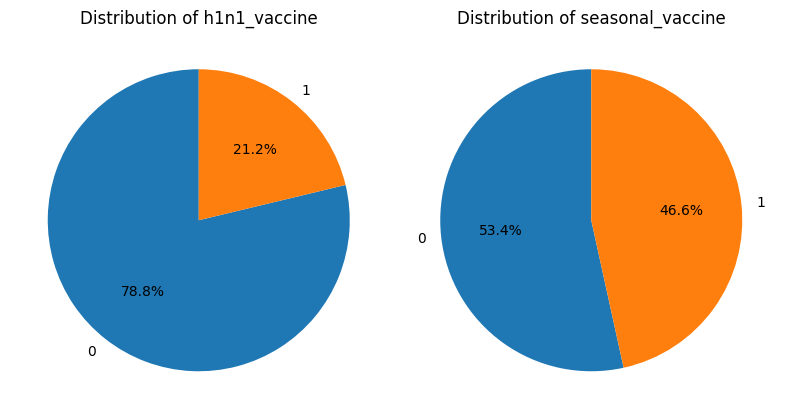

In [ ]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot for H1N1 Vaccine
col1 = 'h1n1_vaccine'
data[col1].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[0]
)
axes[0].set_title(f'Distribution of {col1}')
axes[0].set_ylabel('')

# Plot for Seasonal Vaccine
col2 = 'seasonal_vaccine'
data[col2].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ax=axes[1]
)
axes[1].set_title(f'Distribution of {col2}')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


---

###  **Vaccine Uptake Inference**

####  H1N1 Vaccine:
- **Not Vaccinated (0):** 21,033 individuals (~78.8%)
- **Vaccinated (1):** 5,674 individuals (~21.2%)

**Inference:** The majority of the population **did not receive the H1N1 vaccine**, indicating **vaccine hesitancy or limited access** during the H1N1 outbreak.

---

####  Seasonal Flu Vaccine:
- **Not Vaccinated (0):** 14,272 individuals (~53.4%)
- **Vaccinated (1):** 12,435 individuals (~46.6%)

**Inference:** Seasonal flu vaccine uptake is relatively **more balanced**, with nearly half the population getting vaccinated. This suggests **better public awareness and trust** for the seasonal flu shot compared to H1N1.

---

**Takeaway:** H1N1 vaccine uptake is significantly lower than seasonal flu vaccine uptake, possibly due to:
- Concerns about H1N1 vaccine safety or effectiveness
- Lack of information or urgency
- Public trust issues during pandemic-like scenarios

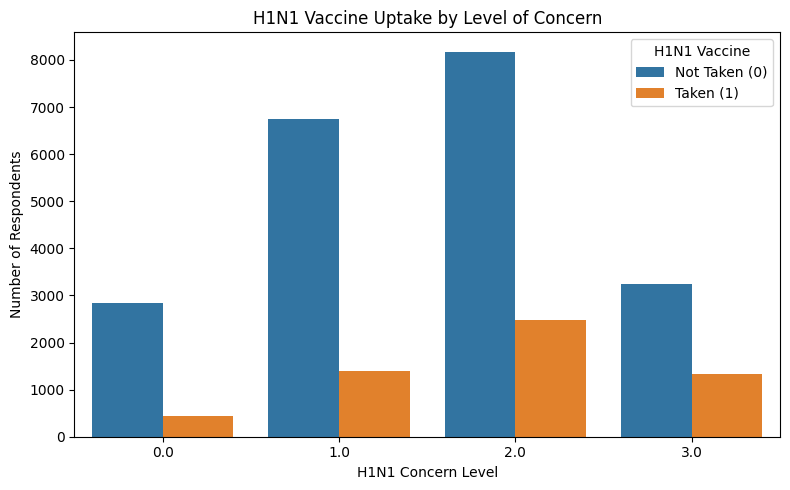

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='h1n1_concern', hue='h1n1_vaccine', data=data)
plt.title('H1N1 Vaccine Uptake by Level of Concern')
plt.xlabel('H1N1 Concern Level')
plt.ylabel('Number of Respondents')
plt.legend(title='H1N1 Vaccine', labels=['Not Taken (0)', 'Taken (1)'])
plt.tight_layout()
plt.show()

In [ ]:
# for col in data.columns[1:]:
#     # Skip if the number of unique values is too high (to avoid clutter)
#     if data[col].nunique() <= 10:
#         data[col].value_counts().plot(
#             kind='pie',
#             autopct='%1.1f%%',   # This shows percentages
#             startangle=90
#         )
#         plt.title(f'Distribution of {col}')
#         plt.ylabel('')  # Remove the default ylabel for better appearance
#         plt.tight_layout()
#         plt.show()
